<a href="https://colab.research.google.com/github/SHRIHARI0143/html-portfolio/blob/main/Nanomaterials.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Nanomaterials Assignment**

---



Name-Meet Patel(2101EE44) &
Shrihari Deshpande(2101EE68)

---




Question:-




Write a computer programming to deduce the total number of atoms and surface atoms for different shell of cuboctahedral/spherical shape. Plot % of atoms in bulk/surface versus particle size. The user should get idea to generate the thickness or size of nanoparticle for a particular application.(namely optical/electrical/magnetic/strength).

Inputs:-

For these we will require four inputs:-


1.   Shape of nanoparticle(Cuboctahedral/Spherical)
2.   Application(optical/electrical/magnetic/strength/none)
3.   Minimum size of nanoparticle
4.   Maximum size of nanoparticle



Outputs:-


1.   A table with deduced values of bulk and surface atoms for each particular layer.
2.   Graph that plots the surface atom % and bulk atom % with respect to particle sizes.
3.   Graph that shows relation between bulk/surface atom ratio with respect to particle sizes.



Theory:-

For calculating the various outputs we will use the below given formulas:-

1. Total Number of atoms in Cuboctahedral shape = (10k^3 + 15k^2 + 11k + 3)/3
2. Number of atoms on the surface of Cuboctahedral shape = (10k^2 + 2)
3. Total Number of atoms in Spherical shape = (10k^3 - 15k^2 + 11k - 3)/3
4. Number of atoms on the surface of Spherical shape = (10k^2 - 20k + 12)

where k is the size of nanoparticle here.

The range between which the value of k should lie will be decided by the input.But,for different properties there are some constrains between which the range of particles should lie they are given as below:-

*   Optical	40-100nm
*   Electrical	10-20nm
*   Strength 1-50nm
*   None - No constrains

After the user gives the inputs, the application will apply the appropriate formulae to calculate surface atoms, bulk atoms and total atoms. First 5 rows of the dataset are then displayed in a table for the viewer.
Below that two graphs would also be displayed one of the % of surface atoms and bulk atoms for the specified shape and other of the bulk/surface atom ratio with respect to particle sizes.

Example:-
To run the below given cell just click on the run button on the top left corner or press **Shift+Enter**.

After that it would ask you for the inputs,after which it would give you the outputs.

For an example of how to run it lets take the inputs as:-


1.   Shape-Cuboctahedral
2.   Properties-Optical
3.   Minimum size-45
4.   Maximum size-90

(No need to write nm in sizes it would be taken care in the code)
After giving these input we would get the output table as well as graph.


Select shape of nanoparticle (Cuboctahedral/Spherical): Cuboctahedral
Select an application (Optical/Electrical/Magnetic/Strength/None): Optical
Enter the minimum size (between 40 and 100): 45
Enter the maximum size (between 45 and 100): 90

Table: Particle Size, Bulk atoms, Surface atoms, Total atoms

   Particle Size  Bulk atoms  Surface atoms  Total atoms
0             45      293789          20252       314041
1             46      314041          21162       335203
2             47      335203          22092       357295
3             48      357295          23042       380337
4             49      380337          24012       404349


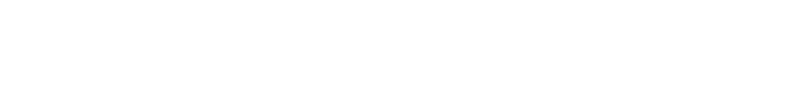

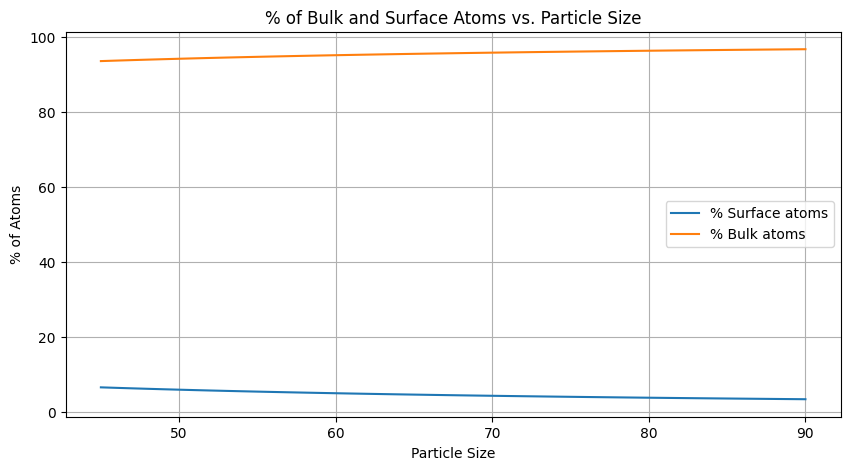

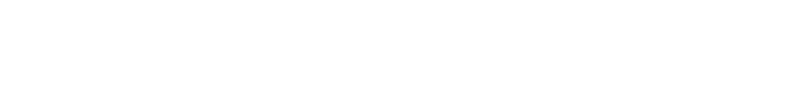

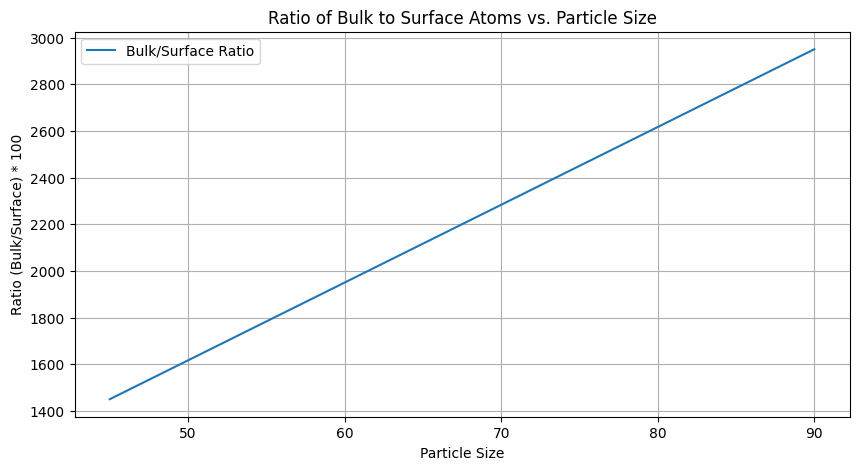

In [ ]:
# Import necessary modules
import pandas as pd
import matplotlib.pyplot as plt

# Functions to deduce the number of atoms per layer
def cuboctahedral_total(layer):
    return int((10 * (layer ** 3) + 15 * (layer ** 2) + 11 * layer + 3) / 3)

def cuboctahedral_surface(layer):
    return int(10 * (layer ** 2) + 2)

def spherical_total(layer):
    return int((10 * (layer ** 3) - 15 * (layer ** 2) + 11 * layer - 3) / 3)

def spherical_surface(layer):
    return int(10 * (layer ** 2) - 20 * layer + 12)

# User inputs for shape and application of nanoparticle
shape = input("Select shape of nanoparticle (Cuboctahedral/Spherical): ").strip().capitalize()
application = input("Select an application (Optical/Electrical/Magnetic/Strength/None): ").strip().capitalize()

# Set minimum and maximum ranges accordingly
if application == 'Optical':
    min_range = 40
    max_range = 100
elif application == 'Electrical':
    min_range = 10
    max_range = 20
elif application == 'Magnetic':
    min_range = 1
    max_range = 10
elif application == 'Strength':
    min_range = 1
    max_range = 50
else:
    min_range = 1
    max_range = 100

# Ask for size range within the allowed limits
size_start = int(input(f"Enter the minimum size (between {min_range} and {max_range}): "))
size_end = int(input(f"Enter the maximum size (between {size_start} and {max_range}): "))

sizes = [i for i in range(size_start, size_end + 1)]
atoms_surface = []
atoms_bulk = []
atom_data = []

# Populate data for tables and graphs depending on shape and range
if shape == 'Cuboctahedral':
    atom_data = [[i, int(cuboctahedral_total(i) - cuboctahedral_surface(i)), cuboctahedral_surface(i), cuboctahedral_total(i)] for i in sizes]
    atoms_surface = [(cuboctahedral_surface(k) / cuboctahedral_total(k)) * 100 for k in sizes]
    atoms_bulk = [(1 - (cuboctahedral_surface(k) / cuboctahedral_total(k))) * 100 for k in sizes]
elif shape == 'Spherical':
    atom_data = [[i, int(spherical_total(i) - spherical_surface(i)), spherical_surface(i), spherical_total(i)] for i in sizes]
    atoms_surface = [(spherical_surface(k) / spherical_total(k)) * 100 for k in sizes]
    atoms_bulk = [(1 - (spherical_surface(k) / spherical_total(k))) * 100 for k in sizes]

# Calculate percentages and ratios
percentages = [[atoms_surface[i], atoms_bulk[i]] for i in range(len(sizes))]
ratios = [atoms_bulk[i] / atoms_surface[i] * 100 for i in range(len(sizes))]

# Create DataFrames for tables
atoms_df = pd.DataFrame(atom_data[:5], columns=['Particle Size', 'Bulk atoms', 'Surface atoms', 'Total atoms'])
print("\nTable: Particle Size, Bulk atoms, Surface atoms, Total atoms\n")
print(atoms_df)

# Add some space before graph
plt.figure(figsize=(10, 1))
plt.axis('off')
plt.text(0.5, 0.5, ' ', fontsize=24, ha='center')

# Plot graphs
plt.figure(figsize=(10, 5))
plt.plot(sizes, atoms_surface, label='% Surface atoms')
plt.plot(sizes, atoms_bulk, label='% Bulk atoms')
plt.xlabel('Particle Size')
plt.ylabel('% of Atoms')
plt.title('% of Bulk and Surface Atoms vs. Particle Size')
plt.legend()
plt.grid(True)
plt.show()

# Add space between graphs
plt.figure(figsize=(10, 1))
plt.axis('off')
plt.text(0.5, 0.5, ' ', fontsize=24, ha='center')

#Plot another graph
plt.figure(figsize=(10, 5))
plt.plot(sizes, ratios, label='Bulk/Surface Ratio')
plt.xlabel('Particle Size')
plt.ylabel('Ratio (Bulk/Surface) * 100')
plt.title('Ratio of Bulk to Surface Atoms vs. Particle Size')
plt.legend()
plt.grid(True)
plt.show()
